![](fig/univ.png)

# AI-1: ML/AI Basics
## Homework 2: Regression Modeling and Bacteria Growth

**AI1 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas

<hr style="height:2.4pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML


### Import Libraries

In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import warnings

<hr style="height:2pt">

### INSTRUCTIONS


- This homework is a jupyter notebook. Download and work on it in your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropraite plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<hr style="height:2pt">


<div class="theme"> <h1>Overview and Data Description</div> </h1>

### Predicting percentage change in multiple bacteria populations given their spreading factor.


In this homework, we will mainly explore polynomial regression for 
predicting a quantitative variable. Specifically, we will build 
regression models that can predict the percentage change in 
bacteria population after 4 hours based on their spreading factor. 
These prediction models can be useful in clustering of a novel bacteria to any class. 

If the percentage of change in population increases this indicates 
that the size of the bacteria population is growing. 
One important factor to note is that the percentage change could be negative. 
This indicates that within the specified time frame, 
the population of the bacteria decreases from the original size.

The data set for this problem has already been split for you. You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively. The first column in each file contains the spreading factor of bacteria populations and the second column gives information about the change in percentage of the population. 



 ### Problem Description

Given the bacteria data, we will try to predict the percentage change 
in population giving the spreading factor. 
Based on the data visualisation we can see that there seems to be a 
non-linear relationship between the 2 variables. For this exercise we 
will consider the `Spreading_factor` to be our predictor variable 
and `Perc_population` to be our response variable. 
We will fit a polynomial regression model for a specified degree that 
computes the respective degree predictors to fit a model on the 
training set which will be evaluated on the test set. 
The performance of the models should be evaluated using their $MSE$.

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h2 style="color:black;background-color:#E7F4FA"> Part 1 </h2>    <br />

<b> Question 1:   Data Visualization [10 points total]</b>
    <br /><br />
**1.1** [6 pts] Generate a scatter plot of the data points in the `bacteria_train.csv` 
file with the `Spreading factor` on the $X$-axis and the `Percentage` 
change on the $Y$-axis. Make sure you clearly label the $x$ and $y$ axes and include proper title. 
<br /><br />
**1.2** [4 pts] Based on the graph, is there any discernable relationship between 
the spreading factor and percentage change in population?
    
</div>


### Solutions

### 1.1

In [3]:
df = pd.read_csv("data/bacteria_train.csv")
x = df[['Spreading_factor']].values
y = df.Perc_population.values

df.head()

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


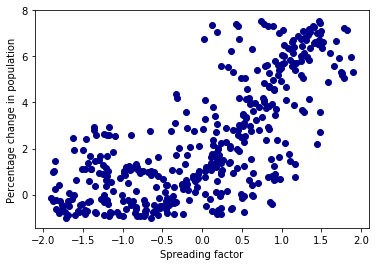

In [4]:
plt.scatter(x,y,color='darkblue')
plt.xlabel("Spreading factor")
plt.ylabel("Percentage change in population")
plt.show()

### 1.2

Though non-linear, there appears to be some relationship between the spreading factor and population change. As the spreading factor increases the population of the bacteria is also increasing. It seems to be somewhere between quatric and cubic.

### Solution Roadmap 

The following figure will give a brief idea of the concepts that are covered in the following sections of this homework.


![](fig/soln-roadmap.png)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<h2 style="color:black;background-color:#E7F4FA"> Part 2 </h2>    <br />
<b> Question 2:   Model Building: Guesstimate the non-linear relationship [10 points total]</b>
<br /><br />
<b>2.1</b> [10 pts] Examine the relationship between the predictor & response variable, and guesstimate the degree of the polynomial regression that may best fit the data.
<br />
- Fit a polynomial regression on the training set.
<br />
- Compute the mean_squared_error on the test set.
<br />
- Plot a graph that displays the true data and the predicted data.
<br />

    
**Hints**
<br />
- Try guesstimating with different degrees
<br /><br />
<b> Why this maybe a good idea? </b>
<br />
- This can help you get a quick baseline
<br />
- The exercise will help you understand the relationship between the variables of the dataset
<br /><br />
<b> Why this maybe a bad idea?</b>
<br />
- Not a robust method because it's based on your guess
<br />
- It may lead you to make unjustified assumptions
    
    
</div>


### Solutions

### 2.1

In [5]:
# Global dictionary to save the MSE values
best_mse_dict = {}

In [6]:
df = pd.read_csv("data/bacteria_train.csv")
df = df.sample(frac=1).reset_index(drop=True)
x_train = df[['Spreading_factor']].values
y_train = df.Perc_population.values

df1 = pd.read_csv("data/bacteria_test.csv")
df1 = df1.sample(frac=1).reset_index(drop=True)
x_test = df1[['Spreading_factor']].values
y_test = df1.Perc_population.values


In [7]:
degree = 3

#Compute the polynomial features
x_poly_train = PolynomialFeatures(degree).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree).fit_transform(x_test)

#Fit a linear regression model
linreg = LinearRegression()
linreg.fit(x_poly_train, y_train)
y_test_pred = linreg.predict(x_poly_test)


In [8]:
#Compute the mean_squared_error on the test set and name it mse 

mse = mean_squared_error(y_test,y_test_pred)
print("Mean square error of the model with degree",degree,"is",mse)

best_mse_dict["Part 2"] = mse

Mean square error of the model with degree 3 is 2.6519056545149615


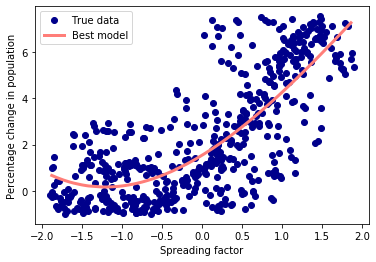

In [9]:
lists = sorted(zip(*[x_test, y_test_pred]))
sorted_x_test, sorted_y_test_pred = list(zip(*lists))

plt.plot(x_train,y_train,'o',color="darkblue")
plt.plot(x_test,y_test,'o',color="darkblue", label="True data")
plt.xlabel('Spreading factor')
plt.ylabel('Percentage change in population')
plt.plot(sorted_x_test, sorted_y_test_pred,color='#FF7E79',linewidth=3, label = "Best model")
plt.legend()
plt.show()

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h2 style="color:black;background-color:#E7F4FA"> Part 3 </h2>    <br /><br />

<b> Question 3:   Use a validation set to find the most promising non-linear relationship [12 points total]</b>
<br />
**3.1** [4 pts] Take out a small fraction of the training set for **validation**.<br /><br />
- For each degree of the polynomial<br />
     - Fit a polynomial regression on the training set.<br />
     - Calculate the mean_squared_error ($MSE$) on the *validation set*.<br />
    
- Compare the values of the validation set, and select the degree for which the validation error is the least.<br />
- Plot the train and validation MSE for each degree.
<br />

**Hints**<br />
- Limit the maximum degree to 50.<br />
- Limit the number of bootstraps to 100.<br /><br />

**3.2** [4 pts] Now, with the best selected degree, again train the polynomial regression on the **complete training set** (including the small fraction that you took out to make the validation set). 
Compute the $MSE$ on the test set.
<br />
Plot the true data and the predicted data.<br /><br />
**3.3** [4 pts] Compute the confidence intervals  for the coefficients for the beta distribution and plot it. This is similar to the one you have done in the exercise.
<br /><br />

<b>Why this maybe a good idea? </b>
<br />
- Better than guesstimates<br />
- Now you can compare models & make a more informed decision<br />
- Still quick, & more reliable<br /><br />

<b> Why this maybe a bad idea? </b>

<br />
- Still not a robust method because it depends on the choice of the validation set
<br /><br />
</div>  
                                                                                                                                 

### Solutions

### 3.1

In [10]:
df = pd.read_csv("data/bacteria_train.csv")
#df = df.sample(frac=1).reset_index(drop=True)
x = df[['Spreading_factor']].values
y = df['Perc_population'].values

df1 = pd.read_csv("data/bacteria_test.csv")
#df1 = df.sample(frac=1).reset_index(drop=True)
x_test = df1[['Spreading_factor']].values
y_test = df1.Perc_population.values

In [11]:
# split the train data into train and validation sets 
# We have altered the random state to 44

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=44)

In [12]:
max_degree = 30
train_mse = []
val_mse = []

for d in range(1,max_degree+1):
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_val = PolynomialFeatures(d).fit_transform(x_val)
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly_train,y_train)
    y_train_pred = lin_reg.predict(x_poly_train)
    y_val_pred = lin_reg.predict(x_poly_val)

    train_mse.append(mean_squared_error(y_train,y_train_pred))
    val_mse.append(mean_squared_error(y_val,y_val_pred))

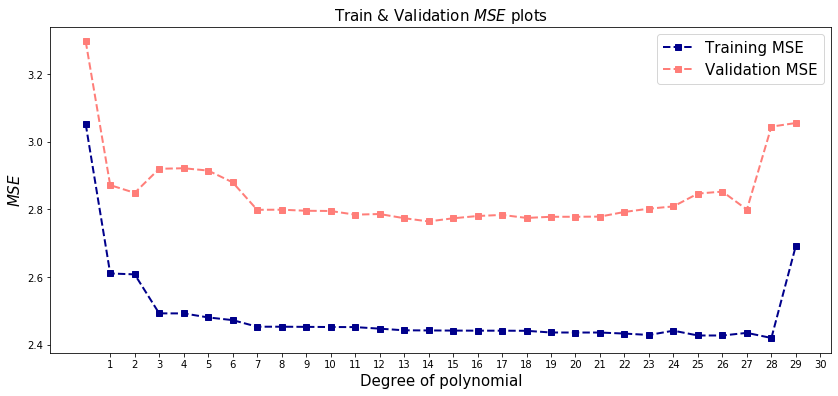

In [13]:
fig, ax = plt.subplots(figsize = (14,6),facecolor='w')
ax.plot(range(max_degree),train_mse,'s--',color='darkblue', \
        label = 'Training MSE',linewidth=2)
ax.plot(range(max_degree),val_mse,'s--',color='#FF7E79', \
        label = 'Validation MSE',linewidth=2)
ax.set_xlabel(r'Degree of polynomial', fontsize=15)
ax.set_ylabel('$MSE$', fontsize=15)
ax.set_title(r'Train & Validation $MSE$ plots',fontsize= 15)
ax.legend(loc='best',fontsize =15)
ax.set_xticks(range(1,max_degree+1));


In [14]:
# Print the train and validation MSE along with the degree of the best model. 

best_deg = val_mse.index(min(val_mse))+1
print("The best model has a degree of", \
      best_deg, "with a training MSE of",train_mse[best_deg-1], \
      "and a validation MSE of",min(val_mse))


The best model has a degree of 15 with a training MSE of 2.441812117453897 and a validation MSE of 2.7642741851801995


### 3.2

In [15]:
x_poly = PolynomialFeatures(best_deg).fit_transform(x)
x_poly_test = PolynomialFeatures(best_deg).fit_transform(x_test)

lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
y_test_pred = lin_reg.predict(x_poly_test)

In [16]:
mse = mean_squared_error(y_test, y_test_pred)
print("The MSE of the the best model is",mse)
best_mse_dict["Part 3"] = min(val_mse) 

The MSE of the the best model is 2.7364825064084553


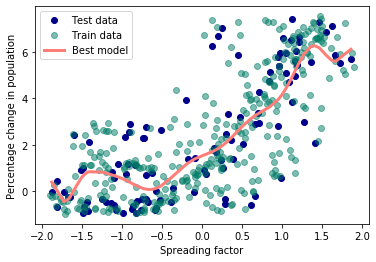

In [17]:
lists = sorted(zip(*[x_test, y_test_pred]))
sorted_x_test, sorted_y_test_pred = list(zip(*lists))

plt.plot(x_test,y_test,'o',color='darkblue', label='Test data')
plt.plot(x_train,y_train,'o',color="#007D66", alpha=0.5, label='Train data')
plt.xlabel('Spreading factor')
plt.ylabel('Percentage change in population')
plt.plot(sorted_x_test,sorted_y_test_pred,color='#FF7E79',linewidth=3, label='Best model')
plt.legend()
plt.show()

### 3.3

In [18]:
bootstrap = []
numboot = 100

for i in range(numboot):
    newdf = df.sample(frac=1, replace=True)
    x_poly = PolynomialFeatures(best_deg).fit_transform(newdf[['Spreading_factor']])
    y_poly = newdf.Perc_population
    linreg = LinearRegression(fit_intercept=False)
    linreg.fit(x_poly,y_poly)
    bootstrap.append(linreg.coef_)

bootstrap = np.array(bootstrap)

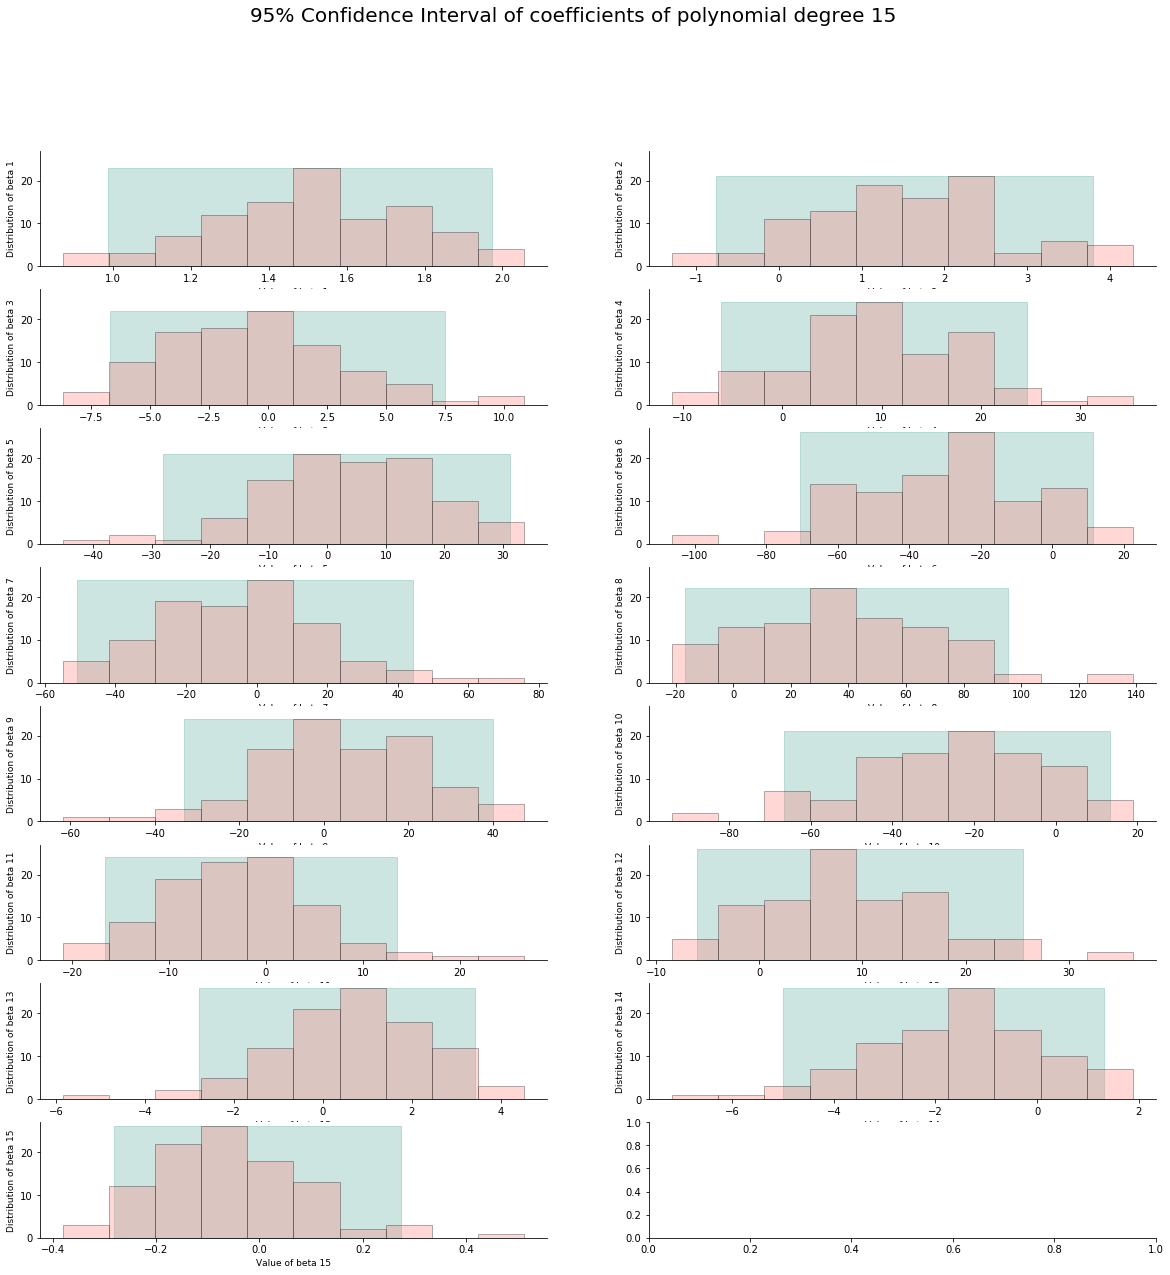

In [19]:
row = math.ceil(best_deg/2)
fig, ax = plt.subplots(row,2, figsize = (20,20))
ax = ax.ravel()
for i in range(best_deg):
    betavals = bootstrap[:,i]
    betavals.sort()
    x1 = np.percentile(betavals,2.5)
    x2 = np.percentile(betavals,97.5)
    x = np.linspace(x1,x2,500)
    counts, bins = np.histogram(betavals)
    y = counts.max()
    ax[i].hist(bootstrap[:,i],bins =10,color="#FF7E79",alpha=0.3,edgecolor='black', linewidth=1, label="Beta coefficient")
    ax[i].fill_between(x,y, color = '#007D66',alpha=0.2, label="95% CI")
    # Prettify
    ax[i].set_ylim(0,27)
    ax[i].set_ylabel(f'Distribution of beta {i+1}',fontsize=9)
    ax[i].set_xlabel(f'Value of beta {i+1}',fontsize=9)
fig.suptitle(f'95% Confidence Interval of coefficients of polynomial degree {best_deg}  ', fontsize = 20)
sns.despine()

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h2 style="color:black;background-color:#E7F4FA"> Part 4 </h2>    <br /><br />
<b> Question 4:   Finding the best model by k-fold cross-validation [15 points total]</b>
<br /><br />
<b>4.1</b> [9 pts] In this part we find the best degree of the polynomial regression by running the model on a range of degree values and using k-fold cross validation. Use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.
<br /><br />
<b>Instructions</b><br />
- Select the max degree for computing the polynomial features. <br />
- For each degree in this range perform the following:<br />
    - Compute the polynomial features for the data.<br />
    - Perform k-fold cross validation with k=10<br />
    - Compute the $MSE$ of the train and validation data and store in separate lists. <br />
- Print the train and validation MSE along with the degree of the best model. To do this find the degree that gives the lowest MSE.
<br />
-Plot the train and validation score with respect to the degrees. Also indicate the mean+standard deviation and mean-standard deviation in the graph.
<br />

<b> Hints </b><br />
* Limit the maximum degree to 50. *<br />

* Use sklearn `cross_validate()` to perform cross validation. *<br /><br />

**4.2** [6 pts] Fitting the best model on the test data and compute the $MSE$ on the test set.<br /><br />

**Instructions**<br />
- For the best degree computed above, compute the polynomial features for the data in the test csv file.<br />
- Train on the entire data from the train csv file and predict on the test data.<br />
- Report the $MSE$ for the fitted models on both the training and test sets. <br />
- Make a scatter plot of `Spread factor` vs. `Precentage change in population` for the specified degree.  The figure should have plot of the test prediction from the regression and the actual values on the same figure. Plot the fit curve for the best model.<br />
- Print the coefficients of the model.<br /><br />

**Hints**<br />
* Sort the $x$ values before making your plots.*
<br /><br />

**Why this maybe a good idea?**<br />

- Avoids the dependence on the particular choice of a validation set<br /><br />

**Why this maybe a bad idea?**<br />

- The size of the dataset restricts the choice of the number of folds<br />
- Computationally more intensive<br /><br />
    
</div>

### Solutions

### 4.1

In [20]:
df = pd.read_csv("data/bacteria_train.csv")

df = shuffle(df)
x_train = df[['Spreading_factor']].values
y_train = df.Perc_population.values

In [21]:
df1 = pd.read_csv("data/bacteria_test.csv")
x_test = df1[['Spreading_factor']].values
y_test = df1.Perc_population.values

In [22]:
max_degree = 20
degree = max_degree

train_score = []
validation_score = []
validation_var = []

for d in range(1,degree+1):
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    lin_reg = LinearRegression()
    mse_score = cross_validate(lin_reg, x_poly_train, y_train, cv=5,scoring="neg_mean_squared_error",return_train_score=True)
    train_score.append(np.mean(-mse_score['train_score']))
    validation_score.append(np.mean(-mse_score['test_score']))
    validation_var.append(np.std(mse_score['test_score']))

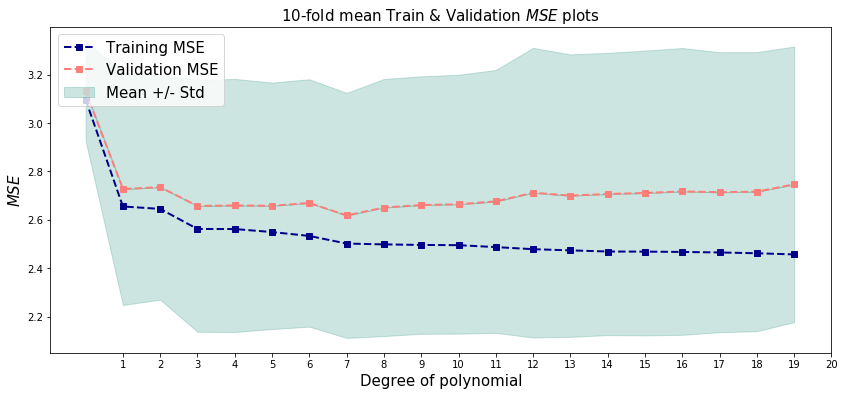

In [23]:
fig, ax = plt.subplots(figsize = (14,6),facecolor='w')
ax.plot(range(max_degree),train_score,'s--',color='darkblue',\
        label = 'Training MSE',linewidth=2)
ax.plot(range(max_degree),validation_score,\
        's--',color='#FF7E79',label = 'Validation MSE',linewidth=2)

ax.fill_between(range(max_degree),validation_score, \
                np.array(validation_score)+validation_var, color="#007D66", \
                alpha=0.2,label = 'Mean +/- Std')
ax.fill_between (range(max_degree),validation_score, \
                 np.array(validation_score)-validation_var, color="#007D66",alpha=0.2)
ax.set_xlabel(r'Degree of polynomial', fontsize=15)
ax.set_ylabel('$MSE$', fontsize=15)
ax.set_title(r'10-fold mean Train & Validation $MSE$ plots',fontsize= 15)
ax.legend(loc='upper left',fontsize =15)
# ax.set_ylim([2,4])
ax.set_xticks(range(1,max_degree+1));

In [24]:
print(min(train_score))
print(min(validation_score))

2.4566108332643357
2.6177356203531765


In [25]:
# Print the best degree
best_deg = validation_score.index(min(validation_score))+1
print("The best model has a degree of", best_deg )

The best model has a degree of 8


### 4.2

In [26]:
# Compute the polynomial features
x_poly_train = PolynomialFeatures(best_deg).fit_transform(x_train)
x_poly_test = PolynomialFeatures(best_deg).fit_transform(x_test)

#Fit a linear regression model
linreg = LinearRegression()
linreg.fit(x_poly_train, y_train)
y_test_pred = linreg.predict(x_poly_test)


In [27]:
# Print the best MSE
mse =  mean_squared_error(y_test,y_test_pred)
print("MSE of the best model is",mse)

best_mse_dict["Part 4"] = mse


MSE of the best model is 2.6130106373530118


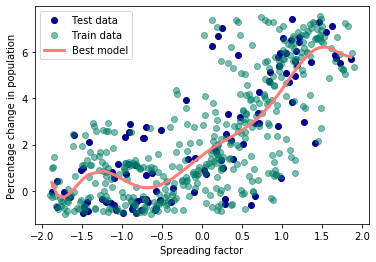

In [28]:
lists = sorted(zip(*[x_test, y_test_pred]))
sorted_x_test, sorted_y_test_pred = list(zip(*lists))

plt.plot(x_test,y_test,'o',color='darkblue', label='Test data')
plt.plot(x_train,y_train,'o',color="#007D66", alpha=0.5,label='Train data')
plt.xlabel('Spreading factor')
plt.ylabel('Percentage change in population')
plt.plot(sorted_x_test,sorted_y_test_pred,color='#FF7E79',linewidth=3 ,label='Best model')
plt.legend()
plt.show()


In [29]:
print("Coefficients of the best model is as follows:\n")
for i in range(len(linreg.coef_)):
    print ("Beta"+str(i),linreg.coef_[i])


Coefficients of the best model is as follows:

Beta0 0.0
Beta1 2.5970277751111657
Beta2 -1.0948684730724374
Beta3 -1.1891344117017961
Beta4 3.4831491377614108
Beta5 0.6528766407091665
Beta6 -1.7130078660040997
Beta7 -0.1153051629180426
Beta8 0.2404183735140415


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h2 style="color:black;background-color:#E7F4FA"> Part 5 </h2>    <br />

<b> Question 5:   Finding the most <b>consistent</b> model; use k-fold cross validation along with Bootstraps [3 points total]</b><br />
<br />



**5.1** [1 pt] In the previous part, we used k-fold cross-validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps earlier to estimate the confidence interval of our $\beta_i$ values. In this segment, we will use *bootstrapping* to test the robustness of our estimation. As before, we use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.
<br /><br />
**Instructions**<br />
- Select the max degree for computing the polynomial features and number of bootstraps.<br />
- Create bootstraps of the data. For each bootstrap perform the following:<br />
    - For each degree in the range of max degree perform the following:<br />
        - Compute the polynomial features for the data.<br />
        - Perform k-fold cross validation with k=10<br />
        - Compute the polynomial features for the data.<br />
        - Compute the $MSE$ of the train and validation data and store in separate lists. <br />
    - Select the degree for which the mean of the k-fold $MSE$ is the least.<br />
    - Store the best degree in a list<br />
- Plot a graph to show the frequency of the degree voted best for each bootstrap from the list from above steps.<br />
- The degree voted best the most times can be selected as the best degree.<br />
- Retrain on the entire train set and report the $MSE$ on the test set.<br />

<br />

**Hints**
- Limit the maximum degree to 50.
- Limit the number of bootstraps to 100.
- Use sklearn `cross_validate()` to perform cross validation.

<br /><br />
**Why this maybe a good idea?**
<br />
- Further avoids the dependence on the particular choice of a validation set<br />
- Allows for more analysis without data augmentation<br /><br />

**Why this maybe a bad idea?**<br />

- Computationally more intensive<br />
- The stochasticity in the choice of bootstraps may give unexpected results<br /><br />

**5.2** [0.5 pt] What are your observations? <br />

- Why do you see so much variance in the `best_degree` over the bootstraps?<br />
- What will you choose as your `best_degree` for the test set? <br /><br />

**5.3** [0.5 pt] Fitting the best model on the test data<br /><br />

**Instructions**<br />
- For the best degree computed above, compute the polynomial features for the data in the test csv file.<br />
- Train on the entire data from the train csv file and predict on the test data.<br />
- Print the MSE of the model <br />
- Make a scatter plot of `Spread factor` vs. `Precentage change in population` for the specified degree.  The figure should have plot of the test prediction from the regression and the actual values on the same figure. <br />
- Print the coefficients of the model<br /><br />

**Hint**<br />
* Sort the $x$ values before making your plots.
    
    
</div>

### Solutions

### 5.1

In [30]:
# Read the dataset
numboot = 100
max_deg = 30

df = pd.read_csv("data/bacteria_train.csv")
df1 = pd.read_csv("data/bacteria_test.csv")
x_train = df[['Spreading_factor']].values
y_train = df.Perc_population.values


In [31]:
# Bootstrap first & then find the best degree
deg_list = []
for i in range(numboot):
    newdf = df.sample(frac=1,replace=True)
    mse_list = []
    for j in range(1,max_deg+1):
        degree = j
        x_train = newdf[['Spreading_factor']]
        x_poly_train = PolynomialFeatures(degree).fit_transform(x_train)
        y_train = newdf.Perc_population
        linreg = LinearRegression(fit_intercept=False)
        mse_score = cross_validate(linreg, 
                                   x_poly_train, 
                                   y_train, cv=10, 
                                   scoring="neg_mean_squared_error",
                                   return_train_score=True)
        mean_mse = np.mean(-mse_score['test_score'])
        mse_list.append(mean_mse)
    deg_list.append(mse_list.index(min(mse_list))+1)

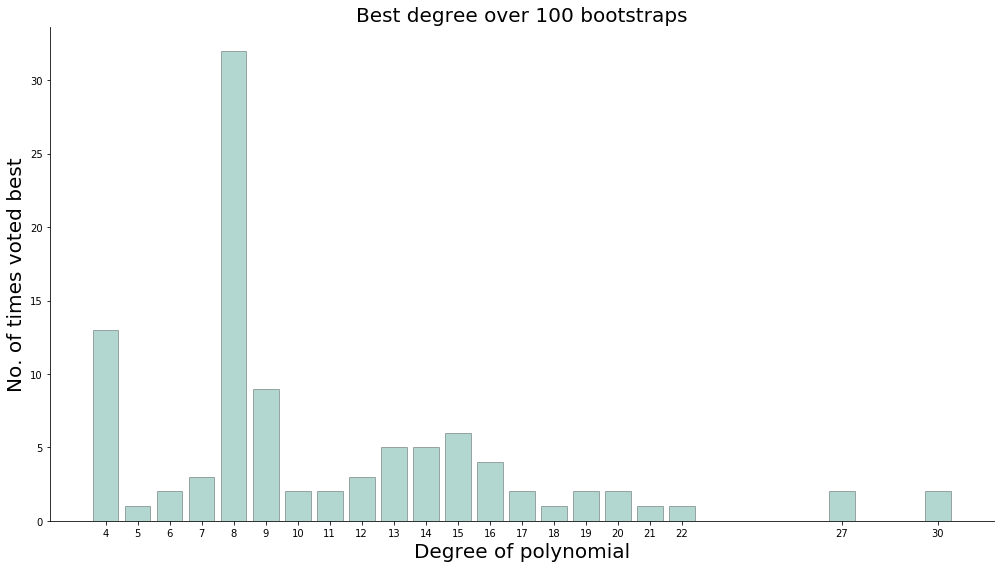

In [32]:
from collections import Counter
c = Counter(deg_list)

fig,ax = plt.subplots(figsize=(14,8))
ax.bar(c.keys(),c.values(),color = '#007D66',alpha=0.3,edgecolor='k')
ax.set_xticks(sorted(c.keys()));
ax.set_xlabel(r'Degree of polynomial', fontsize=20)
ax.set_ylabel('No. of times voted best', fontsize=20)
ax.set_title(f'Best degree over {numboot} bootstraps',fontsize=20)
sns.despine()
plt.tight_layout()

### 5.2

a) The variance could be a result of slight change in the data for each bootstrap.The stochasticity in the choice of bootstraps may also be the reason.

b) The degree with the highest frequency/ number of times voted the best will be the bset degree.

### 5.3

In [33]:
df = pd.read_csv("data/bacteria_train.csv")
df1 = pd.read_csv("data/bacteria_test.csv")
x_train = df[['Spreading_factor']].values
y_train = df.Perc_population.values
x_test = df1[['Spreading_factor']].values
y_test = df1.Perc_population.values


In [34]:
# Select the best degree from the above exercise
best_deg = 8

In [35]:
# Compute the polynomial features
x_poly_train = PolynomialFeatures(best_deg).fit_transform(x_train)
x_poly_test = PolynomialFeatures(best_deg).fit_transform(x_test)

#Fit a linear regression model
linreg = LinearRegression(fit_intercept=False)
linreg.fit(x_poly_train, y_train)
y_test_pred = linreg.predict(x_poly_test)

In [36]:
# Print the best model
mean_squared_error(y_test,y_test_pred)
print("MSE of the best model is", mse)

best_mse_dict["Part 5"] = mse

MSE of the best model is 2.6130106373530118


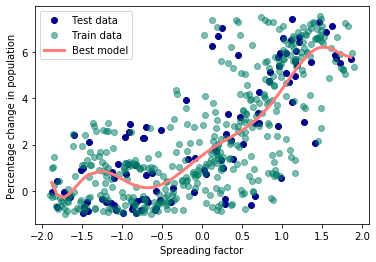

In [37]:
lists = sorted(zip(*[x_test, y_test_pred]))
sorted_x_test, sorted_y_test_pred = list(zip(*lists))

plt.plot(x_test,y_test,'o',color='darkblue', label="Test data")
plt.plot(x_train,y_train,'o',color="#007D66", alpha=0.5,label="Train data")
plt.xlabel('Spreading factor')
plt.ylabel('Percentage change in population')
plt.plot(sorted_x_test,sorted_y_test_pred,color='#FF7E79',linewidth=3, label="Best model")
plt.legend()
plt.show()

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h2 style="color:black;background-color:#E7F4FA"> Part 6 </h2>    <br />
<b> Question 6:   Improving model consistency [30 points total]</b>
<br /><br />
In the previous section, we compared **30** polynomial models to find the best degree. For each model of degree n, we considered all polynomial coefficients *up to* **degree `n`** using `Polynomial_features`. However, our **best model** could have been from any possible combination of the **30** degrees chosen.
<br />
For eg. a model with degrees `1,2,4,6`
<br />
The total number of such possible models is $2^{30}\approx10^9$ and searching through all of them would be laborious and computationally inefficient. Instead, we can use $Lasso$ Regularisation which *switches off* highly unstable degree coefficients and gives us the most efficient solution.
<br /><br />

**6.1** [10 pts] Find the best hyper-parameter `alpha`<br />

First, we will use `cross_validation` to find the the best regularisation parameter `alpha`. As before, we use the `bacteria_train.csv` for cross validation.
<br /><br />
**NOTE**: You are free to experiment with the values of alpha. Our suggestion is to use in powers of 10 from $10^{-3}$ to $10^{3}$
<br /><br />
** Instructions**<br />
- Select the max degree of the polynomial, and make a list of `alpha` values.<br />
- For each value of `alpha`:<br />
    - Compute the polynomial features for the data.<br />
    - Create a `Lasso` regularisation model with the value of `alpha`<br />
    - Perform k-fold cross validation with k=10 using `Lasso` as model.<br />
    - Compute the $MSE$ of the train and validation data and store in separate lists. <br />
- Select the `alpha` for which the mean of the k-fold $MSE$ is the least.<br />
- Store the previously selected values as `best alpha` & print it.<br />

<br /><br />

** Hints**<br />
- Limit the maximum degree to 30.<br />
- Take at least three different values of alpha.<br />
- Use sklearn `cross_validate()` to perform cross validation.<br /><br />

**6.2** [10 pts] Find the most significant degrees.<br />

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this to find the most significant degrees over a given number of bootstraps. What we mean by the above is this:<br />

For each bootstrap of the data, you will get some degrees that are **significant** ($\mid\beta_i\mid \lt 0.1 $). You would like to see, which degree coefficients are significant over several such iterations.<br />

As before, we use the `bacteria_train.csv` for cross validation.<br /><br />

NOTE: You are free to experiment with the number of bootstraps.<br /><br />


**Instructions**<br />
- Make a dictionary called `significant_degrees` to store count of degrees for each bootstrap.<br />
- For each bootstrap:<br />
    - Take a sample the dataframe with `frac=1`.<br />
    - Train a **Lasso** model with the `best_alpha` computed above.<br />
    - Find the most significant polynomial coefficients using ($\mid\beta_i\mid \lt 0.1 $).<br />
    - For each significant degree, update the count of that degree in `significant_degrees` .<br />
- Plot the count of degrees for each bootstrap as a bar plot.<br /><br />


**Hints**<br />
- Limit the maximum degree to 30.<br />
- Take at least three different values of alpha.<br />
- Use sklearn `cross_validate()` to perform cross validation.<br /><br />

**6.3** [5 pts] Compute the MSE on the test set<br />

Now, from the previous plot, you can see that only degrees upto 6 are consistently significant over several bootstraps. You will now retrain the *L1* regularised model on the entire data and find the test $MSE$<br /><br />

**Instructions**<br />

- Retrain the *regularised* model with *most frequent degree (most significant highest degree)* on the entire test set and report the $MSE$ on the test set.<br />
- Find the degrees of the polynomial that have cofficients with absolute value greater than 0.1<br />
- Compare the test $MSE$ computed in section 3, to the previous section and report your observations.<br />
- Plot a graph indicating your true and predicted data.<br />

**6.4** [5 pts] What are your Observations?<br />

- Is the `best_degree` computed above more consistent over the bootstraps? Why?<br />
- Which degree coefficients in your best fit model from above are significant? Why only some?<br />
- Is your test $MSE$ with regularisation comparable to the findings from previous section. If more, or less, by how much?<br />
- Is your current model more reliable? On what basis do you claim its robustness?<br />
    
    
</div>

### Solutions

### 6.1

In [38]:
# Train data
df = pd.read_csv("data/bacteria_train.csv")

# Assign variables
x_train = df[['Spreading_factor']].values
y_train = df.Perc_population.values

# Parameters
alpha_list = [1e-4, 1e-3, 1e-2,1e-1,1]
numboot = 10
max_degree = 30


In [39]:
# Bootstrap first & then find the best regularisation coefficient
warnings.filterwarnings('ignore')
mse_list = []

for alpha in alpha_list:

    x_train = newdf[['Spreading_factor']]
    x_poly_train = PolynomialFeatures(max_degree).fit_transform(x_train)
    y_train = newdf.Perc_population
    lasso = Lasso(fit_intercept=False, alpha=alpha, max_iter = 100000)
    mse_score = cross_validate(lasso, 
                               x_poly_train, 
                               y_train, cv=10, 
                               scoring = 'neg_mean_squared_error')
    mean_mse = np.mean(-mse_score['test_score'])
    mse_list.append(mean_mse)

best_alpha = alpha_list[mse_list.index(min(mse_list))]

print(f'The best alpha value is {best_alpha}')


The best alpha value is 0.0001


### 6.2

In [40]:
warnings.filterwarnings('ignore')
significant_degrees = {}
for i in range(numboot):
    newdf = df.sample(frac=1,replace=True)
    x_train = newdf[['Spreading_factor']]
    x_poly_train = PolynomialFeatures(30).fit_transform(x_train)
    y_train = newdf.Perc_population

    lasso = Lasso(fit_intercept=False,max_iter = 20000, alpha=best_alpha)
    lasso.fit(x_poly_train, y_train)
    for i in np.where(np.abs(lasso.coef_>0.1))[0]:

        if i not in significant_degrees.keys():
            significant_degrees[i]=1
        else:
            significant_degrees[i]+=1

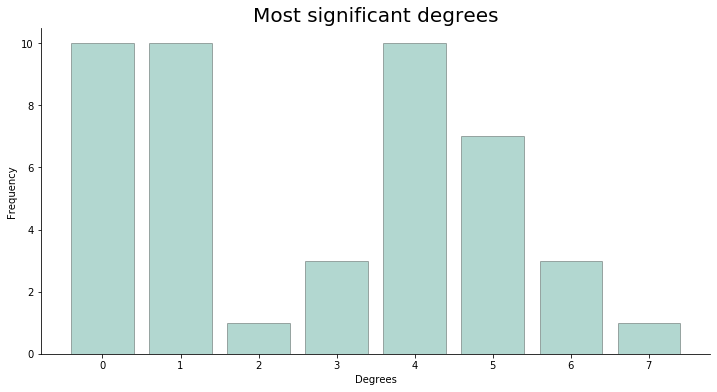

In [41]:
fig, ax = plt.subplots(figsize=(12,6))

lists = sorted(significant_degrees.items())

x,y = zip(*lists)

ax.bar(x,y,color = '#007D66',alpha=0.3,edgecolor='k')
ax.set_xlabel('Degrees')
ax.set_ylabel('Frequency')
ax.set_title('Most significant degrees',fontsize = 20)

sns.despine()

### 6.3

In [46]:
df = pd.read_csv('data/bacteria_train.csv')
df1 = pd.read_csv('data/bacteria_test.csv')

best_deg = 4

x_train = df[['Spreading_factor']].values
y_train = df['Perc_population'].values
x_test = df1[['Spreading_factor']].values
y_test = df1['Perc_population'].values

x_poly_train = PolynomialFeatures(best_deg).fit_transform(x_train)
x_poly_test = PolynomialFeatures(best_deg).fit_transform(x_test)
lasso = Lasso(max_iter=20000, alpha = best_alpha, fit_intercept= False)

lasso.fit(x_poly_train,y_train)
y_test_pred = lasso.predict(x_poly_test)
mse = mean_squared_error(y_test, y_test_pred)
print("The MSE of the best model is",mse)

best_mse_dict["Part 6"] = mse

The MSE of the best model is 2.5999086787243395


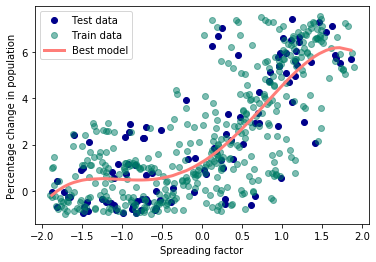

In [47]:
lists = sorted(zip(*[x_test, y_test_pred]))
sorted_x_test, sorted_y_test_pred = list(zip(*lists))

plt.plot(x_test,y_test,'o',color='darkblue', label="Test data")
plt.plot(x_train,y_train,'o',color="#007D66", alpha=0.5,label="Train data")
plt.xlabel('Spreading factor')
plt.ylabel('Percentage change in population')
plt.plot(sorted_x_test,sorted_y_test_pred,color='#FF7E79',linewidth=3, label="Best model")
plt.legend()
plt.show()

### 6.4

A) The best degree is not consistent owing once again to the stochasticity in the choice of bootstraps which might give unexpected results. 

B) The coefficients that are significant are of degrees 0, 1, 4, 5, 6.

C) The test MSEs in the two cases are comparable. However the later is slightly lower. 

D) Yes, the current model is more reliable as bootstrapping shows similar results. This is justified by the fact that we have obtained lower test MSE using this degree 4 curve than the previous degree 8 curve.


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h2 style="color:black;background-color:#E7F4FA"> Part 7 </h2>    <br /><br />
<b> Question 7:   Display your best test MSEs for each sub section of the homework [10 points total]</b>
<br /><br />

**7.1** [10 pts] Convert the dictionary used to store the best MSE values from each section of the homework into a pandas dataframe. 
<br /><br />
- Take a look at how the $MSE$ values have varied throughout the homework and plot these $MSE$ values are a bar chart.
</div>

### Solutions

### 7.1

In [48]:
df_mse = pd.DataFrame.from_dict(best_mse_dict,orient='index').reset_index()
df_mse.columns = ['section','mse']
df_mse

,section,mse
0,Part 2,2.651906
1,Part 3,2.764274
2,Part 4,2.613011
3,Part 5,2.613011
4,Part 6,2.599909


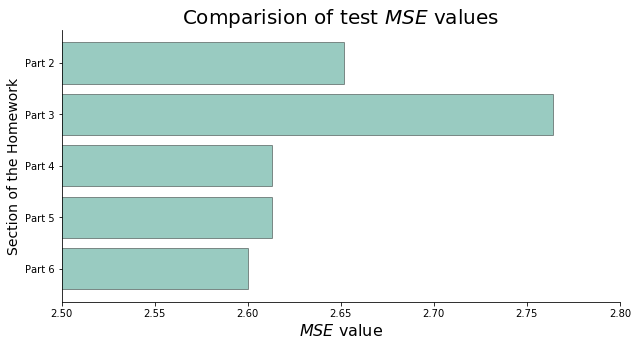

In [49]:
fig, ax = plt.subplots(figsize = (10,5))
ax.barh(df_mse.section.values[::-1], df_mse.mse.values[::-1], alpha=0.4, color = '#007D66',edgecolor='k')
ax.set_xlim([2.5,2.8])
ax.set_ylabel('Section of the Homework',fontsize =14)
ax.set_xlabel('$MSE$ value',fontsize=16)
ax.set_title('Comparision of test $MSE$ values',fontsize=20)
sns.despine()